# DNN (Deep Neural Networks)

## Gradient Descent

Before jumping right into neural networks let's look at a simple idea of how we can perform gradient descent.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

Let's say we have a simple line $y=5x+2$.

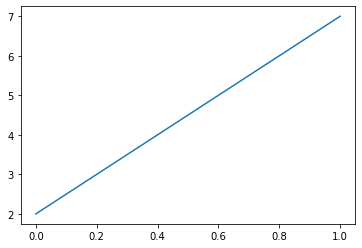

In [2]:
X = np.linspace(0, 1, 100)
y = 5 * X + 2

plt.plot(X, y)
plt.show()

So the model will have two coefficients - $k, b$. For sure it's easy to solve it analytically and it's an overkill to use gradient descent, but this is just for illustration purposes. The idea is super simple - let's move into the direction which leads to lower cost (error).

<img src="https://miro.medium.com/max/1005/1*_6TVU8yGpXNYDkkpOfnJ6Q.png" style="width: 50%"/>

For regression task it is common to use MSE loss $(\hat{y} - y)^2$. Now its derivative is just $2(\hat{y} - y)$, thus simplifying our implementation (acctually we could skip $2$ and increase learning rate instead).

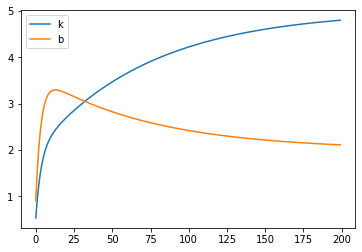

In [3]:
k, b = 0, 0     # initial values
epochs = 200
learning_rate = 0.1

L = []   # storage for k and b through training
for i in range(epochs):
    pred = k * X + b
    diff_k = X
    diff_b = 1
    k -= learning_rate * np.mean(diff_k * 2 * (pred - y))
    b -= learning_rate * np.mean(diff_b * 2 * (pred - y))
    L.append([k, b])

pd.DataFrame(L, columns=['k', 'b']).plot()
plt.show()

Note, that gradient descent is sensitive to the step size. We will meet some solutions to this problem in the future.

<img src="https://www.researchgate.net/profile/Tom_Duckett/publication/224324276/figure/fig2/AS:359779089305617@1462789427971/Convergence-Conditions-in-Gradient-Descent-Algorithm.png" style="width: 50%"/>

Try to play around with learning rate and see it for yourself.

Also gradient descent is not guaranteed to find global minimum, but when we work with high dimensional data this risk partly wanishes.

<img src="https://paper-attachments.dropbox.com/s_F57E27FDF0C54777F2844EECCBABB7DF8EEB9597E5F323F9CC73F1690617FCAD_1569311505423_image.png" style="width: 50%"/>

You can use the same trick to fit a line over multiple points. Training process should look similar to that:

<img src="https://paper-attachments.dropbox.com/s_F57E27FDF0C54777F2844EECCBABB7DF8EEB9597E5F323F9CC73F1690617FCAD_1567686156887_grad_desc_demo.gif" style="width: 50%"/>

## Timeline

<img src="https://cdn-images-1.medium.com/max/2000/1*Z_DnCyKt18RM0aCCrFzaIQ.png" style="width: 80%"/>

ANNs have been around for quite a while: they were first introduced back in **1943** by the neurophysiologist Warren **McCulloch** and the mathematician Walter **Pitts** (see “A Logical Calculus of Ideas Immanent in Nervous Activity”).

<img src="https://paper-attachments.dropbox.com/s_1F3ADB50AE0E9BFFE47A31C329F32861D3C6E5DDE635C337B9BB647E093C8832_1571117028252_image.png" style="width: 50%"/>

<img src="https://paper-attachments.dropbox.com/s_1F3ADB50AE0E9BFFE47A31C329F32861D3C6E5DDE635C337B9BB647E093C8832_1571117050006_image.png" style="width: 50%"/>

Most of the pictures are taken from the great book "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition" by Aurélien Géron.

## The Perceptron

The *Perceptron* is one of the simplest ANN architectures, invented in **1957** by Frank **Rosenblatt**. It is based on a slightly different artificial neuron called a *threshold logic unit* (TLU), or sometimes a *linear threshold unit* (LTU). A Perceptron is simply composed of a single layer of TLUs, with each TLU connected to all the inputs. 

<img src="https://paper-attachments.dropbox.com/s_1F3ADB50AE0E9BFFE47A31C329F32861D3C6E5DDE635C337B9BB647E093C8832_1571117134137_image.png" alt="Threshold logic unit: an artificial neuron which computes a weighted sum of its inputs then applies a step function" style="width: 50%"/>

<img src="https://paper-attachments.dropbox.com/s_1F3ADB50AE0E9BFFE47A31C329F32861D3C6E5DDE635C337B9BB647E093C8832_1571117253013_image.png" alt="Architecture of a Perceptron with two input neurons, one bias neuron, and three output neurons" style="width: 50%"/>

Lets see how is a Perceptron trained.

The Perceptron training algorithm proposed by **Rosenblatt** was largely inspired by ***Hebb’s rule***. In his **1949** book *The Organization of Behavior* (Wiley), Donald Hebb suggested that when a biological neuron triggers another neuron often, the connection between these two neurons grows stronger. Siegrid Löwel later summarized Hebb’s idea in the catchy phrase, “Cells that fire together, wire together”; that is, the connection weight between two neurons tends to increase when they fire simultaneously. This rule later became known as Hebb’s rule (or *Hebbian learning*).

<img src="https://paper-attachments.dropbox.com/s_DC20E26BBCBCDC1CE35F486489133207E7462B05AFD4747CE4118D2918E8D180_1580039607658_Screenshot+2020-01-26+13.52.47.png" style="width: 70%"/>

The decision boundary of each output neuron is linear, so Perceptrons are incapable of learning complex patterns (just like Logistic Regression classifiers). However, if the training instances are linearly separable, **Rosenblatt** demonstrated that this algorithm would converge to a solution. This is called the **Perceptron convergence theorem**.

### Perceptron for 2 class case

We will produce following perceptron from scratch

<img src="https://miro.medium.com/max/2870/1*n6sJ4yZQzwKL9wnF5wnVNg.png" style="width: 60%"/>

but first we need some data first. We will work with iris dataset.

In [4]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['class'] = iris.target_names[iris.target]

We want a way to plot it, but it has 4 dimensions. PCA to the rescue.

In [5]:
pca = PCA(2)
df['pc_1'], df['pc_2'] = pca.fit_transform(df.iloc[:, :4]).T

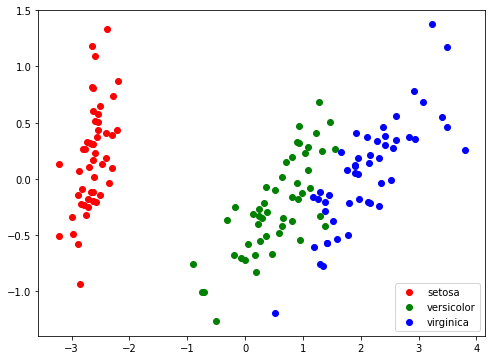

In [6]:
colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}

fig, ax = plt.subplots(figsize=(8, 6))
for label, c in colors.items():
    ax.scatter(x=df[df['class'] == label]['pc_1'],
               y=df[df['class'] == label]['pc_2'],
               c=c,
               label=label)

ax.legend()
plt.show()

We will work only with two class case for now, thus let's change the labels by leaving one class and treating all other points as a second class.

In [7]:
CLASS = 'setosa'

# Prepare data for 2 class test
y = (df['class'] == CLASS).astype('int').values
X = df.iloc[:, :4]

# Apply standart scaler
X = ((X - X.mean()) / X.std()).values

# Add ones for intercept
X = np.hstack([X, np.ones((X.shape[0], 1))])

# Make mask for tain/test set
np.random.seed(42)
mask = np.random.random(X.shape[0]) < 0.7

N, M = X.shape

Now we are ready to try our Perceptron.

In [8]:
epochs = 100
learning_rate = 0.01

# Initial weights between 0 and 1
np.random.seed(42)
W = np.random.random(M)

for _ in range(epochs):
    # Train only on train set
    for features, label in zip(X[mask], y[mask]):
        pred = 0 if np.dot(features, W) > 0 else 1     # step function
        W -= learning_rate * (pred - label) * features

pred_train = np.dot(X[mask], W) > 0
pred_test = np.dot(X[~mask], W) > 0
print('Hit rate (train set) - {0:.02%}, Hit rate (test set) - {1:.02%}'.format(
    (pred_train == y[mask]).mean(), (pred_test == y[~mask]).mean()))

Hit rate (train set) - 98.10%, Hit rate (test set) - 100.00%


Well, clearly it's easy to sepperate setosa from other two classes. Try to change target class to versicolor and virginica.

### Power of perceptron formulation

Perceptron definition is quite flexible and modifying loss and activation allows to replicate some whell known algorithms, see picture taken from “Neural Networks and Deep Learning: A Textbook” (book by Charu C. Aggarwal).

<img src="https://paper-attachments.dropbox.com/s_2E4854D97CFCA11CB3874DE15FA048AD21CE628C357A5C14D6A303FEC847FA36_1596967818835_image.png" style="width: 60%"/>

All of this flexibility and initial results led people to believe that AI is just behind the corner. This is clearly seen in movies, books, conferences, papers, etc.

<img src="https://paper-attachments.dropbox.com/s_2E4854D97CFCA11CB3874DE15FA048AD21CE628C357A5C14D6A303FEC847FA36_1596968518047_Screenshot+2020-08-09+at+13.21.56.png" style="width: 60%"/>

## Beginning of first AI winter

In their **1969** monograph *Perceptrons*, Marvin Minsky and Seymour **Papert** highlighted a number of serious weaknesses of Perceptrons—in particular, the fact that they are incapable of solving some trivial problems (e.g., the *Exclusive OR* (XOR) classification problem.
It turns out that some of the limitations of Perceptrons can be eliminated by stacking multiple Perceptrons (or using ADA activation)!

<img src="https://paper-attachments.dropbox.com/s_1F3ADB50AE0E9BFFE47A31C329F32861D3C6E5DDE635C337B9BB647E093C8832_1571117686838_image.png"  style="width: 50%"/>

But, we have no idea how to train those stacked Perceptorns (DNN - deep neural nets). And also there are no big enough datasets or resources to try this out...

<img src="https://miro.medium.com/max/2101/1*mWYZanOv3QUafz0nnhbEWw.png"  style="width: 50%"/>

## Backpropagation

When an ANN contains a deep stack of hidden layers, it is called a ***deep neural network*** **(DNN)**.

<img src="https://paper-attachments.dropbox.com/s_1F3ADB50AE0E9BFFE47A31C329F32861D3C6E5DDE635C337B9BB647E093C8832_1571117766740_image.png" alt="Architecture of a Multilayer Perceptron" style="width: 50%"/>

For many years researchers struggled to find a way to train MLPs, without success. But in **1986**, David **Rumelhart**, Geoffrey **Hinton**, and Ronald **Williams** published a groundbreaking paper (“Learning Internal Representations by Error Propagation”) that introduced the **backpropagation** training algorithm, which is still used today.

Actually backpropagation was known prior to 1986 (Paul Werbos, 1975)

<img src="https://paper-attachments.dropbox.com/s_1F3ADB50AE0E9BFFE47A31C329F32861D3C6E5DDE635C337B9BB647E093C8832_1571320041201_image.png" alt="Paul Werbos, 1975" style="width: 50%"/>

In short, it is Gradient Descent using an efficient technique for computing the gradients automatically: in just **two passes** through the network (one **forward**, one **backward**), the backpropagation algorithm is able to compute the gradient of the network’s error with regard to every single model parameter.

<img src="https://miro.medium.com/max/3040/1*q1M7LGiDTirwU-4LcFq7_Q.png" style="width: 50%"/>

Automatically computing gradients is called *automatic differentiation*, or *autodiff*. There are various autodiff techniques, with different pros and cons. The one used by backpropagation is called *reverse-mode autodiff*.

### Two layer NN for 2 class case

<img src="https://miro.medium.com/max/1000/1*sX6T0Y4aa3ARh7IBS_sdqw.png" style="width: 40%"/>

In [9]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))
diff = lambda x: x * (1 - x)

hidden = 4
learning_rate = 0.01
epochs = 500

# Initial weights between 0 and 1
np.random.seed(42)
W_0 = np.random.uniform(size=(M, hidden))
W_1 = np.random.uniform(size=(hidden, 1))

Following code implements **back propagation** using gradient descent.

<img src="https://kratzert.github.io/images/bn_backpass/chainrule_example.PNG" style="width: 80%"/>

For extensive chain rule back propagation explanation see [this blog post](https://kratzert.github.io/2016/02/12/understanding-the-gradient-flow-through-the-batch-normalization-layer.html).

In [10]:
for _ in range(epochs):
    # Forward pass (make prediction)
    L_1 = sigmoid(X[mask].dot(W_0))
    L_2 = sigmoid(L_1.dot(W_1))
    # Backward pass (propagate diff)
    diff_2 = (y[mask, np.newaxis] - L_2) * diff(L_2)
    diff_1 = np.dot(diff_2, W_1.T) * diff(L_1)
    W_1 += learning_rate * np.dot(L_1.T, diff_2)
    W_0 += learning_rate * np.dot(X[mask].T, diff_1)

pred_train = (sigmoid(sigmoid(X[mask].dot(W_0)).dot(W_1)) > 0.5).flatten()
pred_test = (sigmoid(sigmoid(X[~mask].dot(W_0)).dot(W_1)) > 0.5).flatten()
print('Hit rate (train set) - {0:.02%}, Hit rate (test set) - {1:.02%}'.format(
    (pred_train == y[mask]).mean(), (pred_test == y[~mask]).mean()))

Hit rate (train set) - 100.00%, Hit rate (test set) - 100.00%


## MNIST (Application of backprop by Yann LeCun, 1989)

<img src="https://paper-attachments.dropbox.com/s_1F3ADB50AE0E9BFFE47A31C329F32861D3C6E5DDE635C337B9BB647E093C8832_1571320140589_image.png" style="width: 50%"/>
<img src="https://camo.githubusercontent.com/807102dc1f1f17a1318535548d05d54867135be2/68747470733a2f2f6d6c34612e6769746875622e696f2f696d616765732f666967757265732f6d6e6973742d696e7075742e706e67" style="width: 50%"/>
<img src="https://paper-attachments.dropbox.com/s_1F3ADB50AE0E9BFFE47A31C329F32861D3C6E5DDE635C337B9BB647E093C8832_1571320219769_image.png" alt="Before training" style="width: 50%"/>
<img src="https://paper-attachments.dropbox.com/s_1F3ADB50AE0E9BFFE47A31C329F32861D3C6E5DDE635C337B9BB647E093C8832_1571320227765_image.png" alt="After training" style="width: 50%"/>
<img src="https://paper-attachments.dropbox.com/s_1F3ADB50AE0E9BFFE47A31C329F32861D3C6E5DDE635C337B9BB647E093C8832_1571118051404_image.png" style="width: 50%"/>

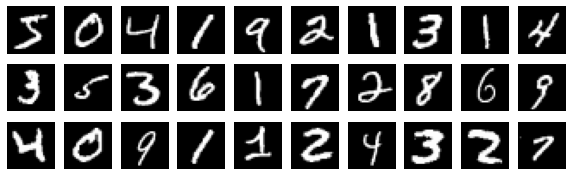

In [11]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
# Normalize
X_train = X_train / 255
X_test = X_test / 255

plt.figure(figsize=(10, 3))
for i in range(30):
    plt.subplot(3, 10, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
plt.show()

Before jumping to Keras let's see of how this would look like if we try to build it from scratch.

The idea lies on:
- softmax
- cross-entropy loss

We will work out details in the lecture, but our NN ends up to be quite simple. We need to flatten data first.

In [12]:
X_train_flat = X_train.reshape((X_train.shape[0], 28*28))
X_test_flat = X_test.reshape((X_test.shape[0], 28*28))

y_train_one_hot = np.eye(10)[y_train]
y_test_one_hot = np.eye(10)[y_test]

And then just train using gradient descent and backprop rule.

In [13]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))
diff = lambda x: x * (1 - x)
def softmax(z):
    z_exp = np.exp(z - z.max(axis=1, keepdims=True))
    return z_exp / z_exp.sum(axis=1, keepdims=True)

hidden = 50
learning_rate = 0.01
batch_size = 100
epochs = 20

# Initial weights between 0 and 1
np.random.seed(42)
W_0 = np.random.uniform(size=(28*28, hidden), low=-1, high=1)
W_1 = np.random.uniform(size=(hidden, 10), low=-1, high=1)

for e in range(epochs):
    print(f'Running epoch {e}')
    for i in range(0, len(X_train), batch_size):
        X = X_train_flat[i:i+batch_size]
        y = y_train_one_hot[i:i+batch_size]
        # Forward pass (make prediction)
        L_1 = sigmoid(X.dot(W_0))
        L_2 = softmax(L_1.dot(W_1))
        # Backward pass (propagate diff)
        diff_2 = L_2 - y
        diff_1 = np.dot(diff_2, W_1.T) * diff(L_1)
        W_1 -= learning_rate * np.dot(L_1.T, diff_2)
        W_0 -= learning_rate * np.dot(X.T, diff_1)

    pred_train = sigmoid(sigmoid(X_train_flat.dot(W_0)).dot(W_1)).argmax(axis=1)
    pred_test = sigmoid(sigmoid(X_test_flat.dot(W_0)).dot(W_1)).argmax(axis=1)
    print('Hit rate (train set) - {0:.02%}, Hit rate (test set) - {1:.02%}'.format(
        (pred_train == y_train).mean(), (pred_test == y_test).mean()))

Running epoch 0
Hit rate (train set) - 90.83%, Hit rate (test set) - 90.95%
Running epoch 1
Hit rate (train set) - 93.02%, Hit rate (test set) - 92.66%
Running epoch 2
Hit rate (train set) - 94.15%, Hit rate (test set) - 93.57%
Running epoch 3
Hit rate (train set) - 94.80%, Hit rate (test set) - 94.14%
Running epoch 4
Hit rate (train set) - 95.28%, Hit rate (test set) - 94.51%
Running epoch 5
Hit rate (train set) - 95.68%, Hit rate (test set) - 94.75%
Running epoch 6
Hit rate (train set) - 96.02%, Hit rate (test set) - 95.00%
Running epoch 7
Hit rate (train set) - 96.31%, Hit rate (test set) - 95.26%
Running epoch 8
Hit rate (train set) - 96.55%, Hit rate (test set) - 95.34%
Running epoch 9
Hit rate (train set) - 96.74%, Hit rate (test set) - 95.43%
Running epoch 10
Hit rate (train set) - 96.90%, Hit rate (test set) - 95.54%
Running epoch 11
Hit rate (train set) - 97.02%, Hit rate (test set) - 95.63%
Running epoch 12
Hit rate (train set) - 97.19%, Hit rate (test set) - 95.72%
Running e

## Keras

From now on we will use keras to create our models. It will take care of backprop and differentiation, thus we only need to define the NN architecture!

In [14]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(32, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [16]:
loss = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.8483 - accuracy: 0.7650 - val_loss: 0.3627 - val_accuracy: 0.9020
Epoch 2/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3454 - accuracy: 0.9029 - val_loss: 0.2867 - val_accuracy: 0.9187
Epoch 3/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2858 - accuracy: 0.9180 - val_loss: 0.2475 - val_accuracy: 0.9286
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2493 - accuracy: 0.9295 - val_loss: 0.2262 - val_accuracy: 0.9337
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2239 - accuracy: 0.9357 - val_loss: 0.2071 - val_accuracy: 0.9423
Epoch 6/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2030 - accuracy: 0.9422 - val_loss: 0.1923 - val_accuracy: 0.9446
Epoch 7/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1863 - accuracy: 0.9460 - val_loss: 0.1808 - val_accuracy:

<AxesSubplot:>

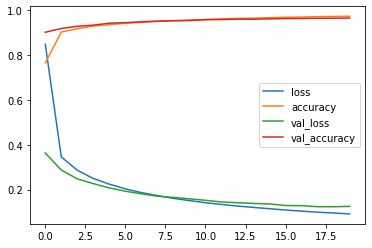

In [17]:
pd.DataFrame(loss.history).plot()

Structurally this is the same network we had before, thus our error rate is expected to be simmilar.

In [18]:
pred = model.predict(X_test).argmax(axis=1)
print('Accuracy on test set - {0:.02%}'.format((pred == y_test).mean()))

Accuracy on test set - 96.47%


Let's explore some predictions.

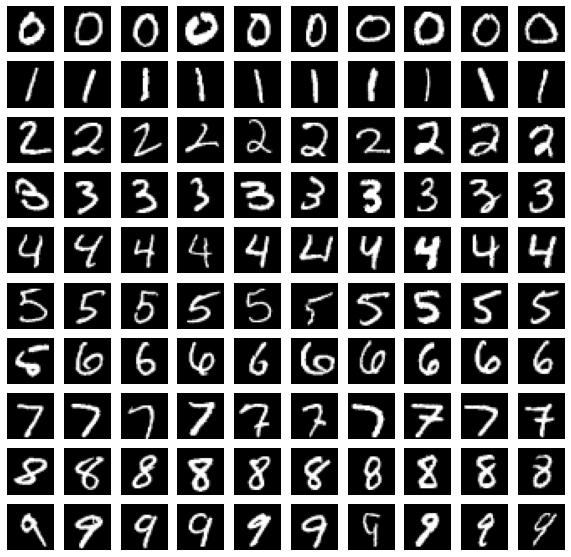

In [19]:
plt.figure(figsize=(10, 10))
for label in range(10):
    for i in range(10):
        plt.subplot(10, 10, label * 10 + i + 1)
        plt.imshow(X_test[pred == label][i], cmap='gray')
        plt.axis('off')
plt.show()

Let's look only at misclassifiesd cases.

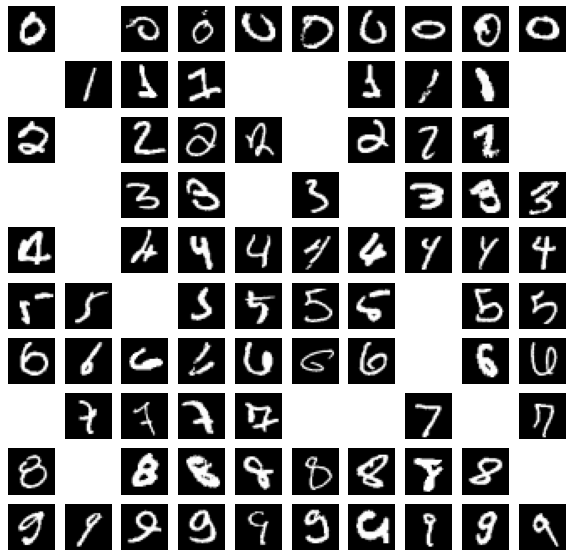

In [20]:
plt.figure(figsize=(10, 10))
for label in range(10):
    for i in range(10):
        plt.subplot(10, 10, label * 10 + i + 1)
        mask = (pred == i) & (y_test == label)
        if mask.sum() > 0:
            plt.imshow(X_test[mask][0], cmap='gray')
        plt.axis('off')
plt.show()

As you might remember Random Forest achieved similar accuracy so why do we need NN then? Well, let's try to increse number of parameters in our network.

In [21]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(1000, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_4 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5010      
Total params: 1,290,510
Trainable params: 1,290,510
Non-trainable params: 0
_________________________________________________________________


In [22]:
loss = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.5957 - accuracy: 0.8545 - val_loss: 0.3070 - val_accuracy: 0.9140
Epoch 2/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2848 - accuracy: 0.9191 - val_loss: 0.2422 - val_accuracy: 0.9328
Epoch 3/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2326 - accuracy: 0.9346 - val_loss: 0.2056 - val_accuracy: 0.9416
Epoch 4/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1985 - accuracy: 0.9437 - val_loss: 0.1836 - val_accuracy: 0.9496
Epoch 5/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1727 - accuracy: 0.9509 - val_loss: 0.1713 - val_accuracy: 0.9503
Epoch 6/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.1525 - accuracy: 0.9576 - val_loss: 0.1516 - val_accuracy: 0.9583
Epoch 7/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1364 - accuracy: 0.9617 - val_loss: 0.1407 - val_accuracy

Accuracy on test set - 97.74%


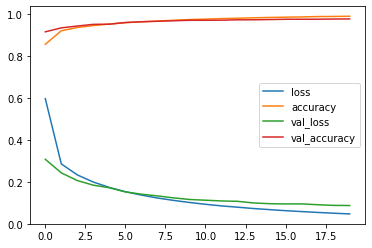

In [23]:
pd.DataFrame(loss.history).plot()
pred = model.predict(X_test).argmax(axis=1)
print('Accuracy on test set - {0:.02%}'.format((pred == y_test).mean()))

Thats better! For examply by using layers 1500, 1000, 500, 10 you can improve accuracy to 98.24%, but training will take quite some time. Acctually you can go even futher with simple data augmentation techniques - https://arxiv.org/pdf/1003.0358.pdf

To the save and load the model you can use:

In [24]:
model.save('mnist-model.h5')
# model = tf.keras.models.load_model('mnist-model.h5')

## Dropout

There is a nice and popular way to **prevent over-fitting** in Neural Networks - turn off some neurons during training procudure.

<img src="https://miro.medium.com/proxy/1*iWQzxhVlvadk6VAJjsgXgg.png" style="width: 50%"/>


You can try that out by adding Dropout layers between Dense ones as follows:

```python
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(32, activation="relu"))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(10, activation="softmax"))
```

Try that out.

As we go further we will see that sometime bigger networks simply don't overfit the data, standard statistics logic starts to break down. This phenomenon is called [Deep Double Descent](https://openai.com/blog/deep-double-descent/).

## Task: approximate interpolation

To get slightly better feel of what 2-layer NN is capable of, let's try to implement idea presented in paper entitled "Constructive approximate interpolation by neural networks" by B. Llanas. Let $P = \{x_0=a, x_1, \dots, x_n=b\}$ be any partition of interval $[a,b]$. Let's define neural net as:

$$
\begin{align}
N_a(x, A) = & \sum_{j=0}^{n-1} (f_j - f_{j+1}) \sigma \left( \frac{-2Ax}{x_{j+1} - x_j} + \frac{x_{j+1} + x_j}{x_{j+1} - x_j} A \right) \\
& + f_n \sigma \left( \frac{-2Ax}{x_n - x_{n-1}} + \frac{3 x_n + x_{n-1}}{x_n - x_{n-1}} A \right)
\end{align}.
$$

Then for interpolation problem $(x_0, f_0), (x_1, f_1), \dots, (x_n, f_n)$ this network yields approximate interpolation and parameter $A > 0$ controls smoothness, lower value will end up in more smooth fit.

**TASK:** implement this using numpy (or tensorflow) and make some plots to convince yourself that it works.

For test you can use any random function, for example:

```python
x = np.sort(np.random.uniform(size=100))
y = np.sin(2 * np.pi * x) + np.sin(5 * np.pi * x) + x
plt.scatter(x, y)
```

*Tip: Note, that weights in the first line can be stacked with weights listed in the second line before implementing dot product.*


### Solution (do not scroll down, try to solve it before without help)

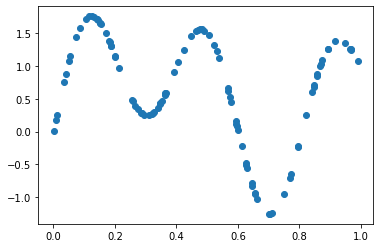

In [25]:
x = np.sort(np.random.uniform(size=100))
y = np.sin(2 * np.pi * x) + np.sin(5 * np.pi * x) + x
plt.scatter(x, y)

/Users/trokas/.local/share/virtualenvs/current-rcFo7dEP/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


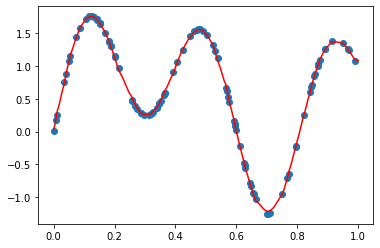

In [29]:
A = 2

diff = x[1:] - x[:-1]

weights = np.append(-2 * A / diff, -2 * A / diff[-1])
bias = np.append((x[1:] + x[:-1]) / diff * A, (3 * x[-1] + x[-2]) / diff[-1] * A)
comb_weights = np.append(y[:-1] - y[1:], y[-1])

x_ref = np.linspace(0, 1, 1000)[:, np.newaxis]
y_interp = sigmoid(weights * x_ref + bias).dot(comb_weights)

plt.scatter(x, y)
plt.plot(x_ref, y_interp, c='red')

## Callbacks

While training the models it is benefficial to have some printout after each apoch, additionally you might want to adjust learning rate, stop training etc. All of these tasks can be achieved using callbacks in fit function, for example:

In [ ]:
from datetime import datetime

# Let's create different dir for each experiment based on timestamp
logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
# This callback will write logs to provided directory
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# We already have the model, but you might want to create new one prior to training
model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=10,
          callbacks=[tensorboard_callback])   # You can provide multiple callbacks here

Now just navigate to `ai_primer` directory, and run following commands:

```sh
pipenv shell
tensorboard --logdir logs/scalars
```

You should get a link (probably - http://localhost:6006/) where you can track the training and compare models. For more examples see: https://www.tensorflow.org/tensorboard/scalars_and_keras.

## (re)Sources
- Rosenblatt’s perceptron, the first modern neural network ([blog post](https://towardsdatascience.com/rosenblatts-perceptron-the-very-first-neural-network-37a3ec09038a))
- Neural Network in 11 lines of code ([blog post](https://iamtrask.github.io/2015/07/12/basic-python-network/))
- Favio Vázquez [posts](https://medium.com/@faviovazquez)
- Neural Networks with good MNIST [demo](https://ml4a.github.io/ml4a/neural_networks/)
- Legendary Andrew Ng [course](https://www.coursera.org/learn/machine-learning)